# Challenge

One of the topics that will be taught in Ironhack's data analytics course is machine learning. In this challenge, you will showcase your knowledge in feature engineering, dimensionality reduction, model selection and evaluation, hyperparameter tuning, and any other techniques of machine learning. 

You will receive a dataset about home sale prices. The dataset is purposefully small and has a variety of variables so that training will not take long and you can focus on the machine learning workflow. Your task is to develop a machine learning model that predicts home sale prices based on the dataset.

There isn't a *correct* solution to this challenge. All we would like to learn is your thinking process that demonstrates your knowledge, experience, and creativity in developing machine learning models. Therefore, in addition to developing the model and optimizing its performance, you should also elaborate your thinking process and justify your decisions thoughout the iterative problem-solving process.

The suggested time to spend on this challenge is 40-60 minutes. If you don't have time to finish all the tasks you plan to do, simply document the to-dos at the end of your response.

**Instructions:**

* Download the [housing prices data set](http://localhost:8888/edit/exercises/data/housing_prices.csv) (`data/housing_prices.csv`).
* Using Python, analyze the features and determine which feature set to select for modeling.
* Train and cross validate several regression models, attempting to accurately predict the SalePrice target variable.
* Evaluate all models and show comparison of performance metrics.
* State your thoughts on model performance, which model(s) you would select, and why.

**Deliverables Checklist:**

* Python code.
* Your thinking process.
* The features selected for machine learning.
* The results (e.g., performance metrics) of your selected model(s).

In [7]:
from __future__ import division

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression, LinearRegression
# from sklearn.cross_validation import train_test_split
# import graphviz
# import xgboost as xgb
from sklearn.metrics import precision_score
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import tree, linear_model
import math
# import xgboost
from sklearn.metrics import explained_variance_score,accuracy_score
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



In [9]:
df=pd.read_csv('housing_prices.csv')

In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
pd.isna(df).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [20]:
pd.isna(df).sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

Here we can see short analysis of database. Sale Price mean is higher than median, hence it is right skewed, which means that number of expensive properties is higher than cheap ones. In order to run proper analysis, it is important to encode string categorial variables.

In [4]:
labels = df['MSZoning'].unique().tolist()
m_MSZoning = dict( zip(labels,range(len(labels))) )
df.replace({'MSZoning': m_MSZoning},inplace=True)

labels = df['LotShape'].unique().tolist()
m_LotShape = dict( zip(labels,range(len(labels))) )
df.replace({'LotShape': m_LotShape},inplace=True)

labels = df['LandContour'].unique().tolist()
m_LandContour = dict( zip(labels,range(len(labels))) )
df.replace({'LandContour': m_LandContour},inplace=True)

labels = df['Utilities'].unique().tolist()
m_Utilities = dict( zip(labels,range(len(labels))) )
df.replace({'Utilities': m_Utilities},inplace=True)

labels = df['LotConfig'].unique().tolist()
m_LotConfig = dict( zip(labels,range(len(labels))) )
df.replace({'LotConfig': m_LotConfig},inplace=True)

labels = df['LandSlope'].unique().tolist()
m_LandSlope = dict( zip(labels,range(len(labels))) )
df.replace({'LandSlope': m_LandSlope},inplace=True)

labels = df['Neighborhood'].unique().tolist()
m_Neighborhood = dict( zip(labels,range(len(labels))) )
df.replace({'Neighborhood': m_Neighborhood},inplace=True)

labels = pd.concat([df['Condition1'], df['Condition1']]).unique().tolist()
m_Condition = dict( zip(labels,range(len(labels))) )
df.replace({'Condition1': m_Condition},inplace=True)
df.replace({'Condition2': m_Condition},inplace=True)

labels = df['ExterQual'].unique().tolist()
m_ExterQual = dict( zip(labels,range(len(labels))) )
df.replace({'ExterQual': m_ExterQual},inplace=True)

labels = df['Foundation'].unique().tolist()
m_Foundation = dict( zip(labels,range(len(labels))) )
df.replace({'Foundation': m_Foundation},inplace=True)

labels = df['SaleType'].unique().tolist()
m_SaleType = dict( zip(labels,range(len(labels))) )
df.replace({'SaleType': m_SaleType},inplace=True)

labels = df['BldgType'].unique().tolist()
m_BldgType = dict( zip(labels,range(len(labels))) )
df.replace({'BldgType': m_BldgType},inplace=True)


Now we can see which variables are important for price prediction.

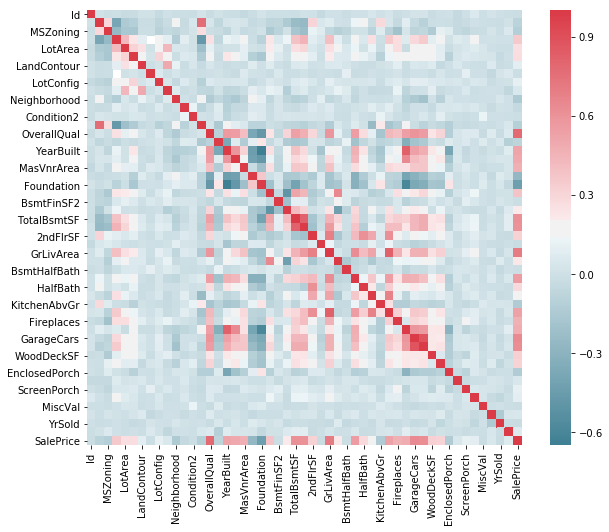

In [5]:
df_corr=df.corr(method='pearson', min_periods=1)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

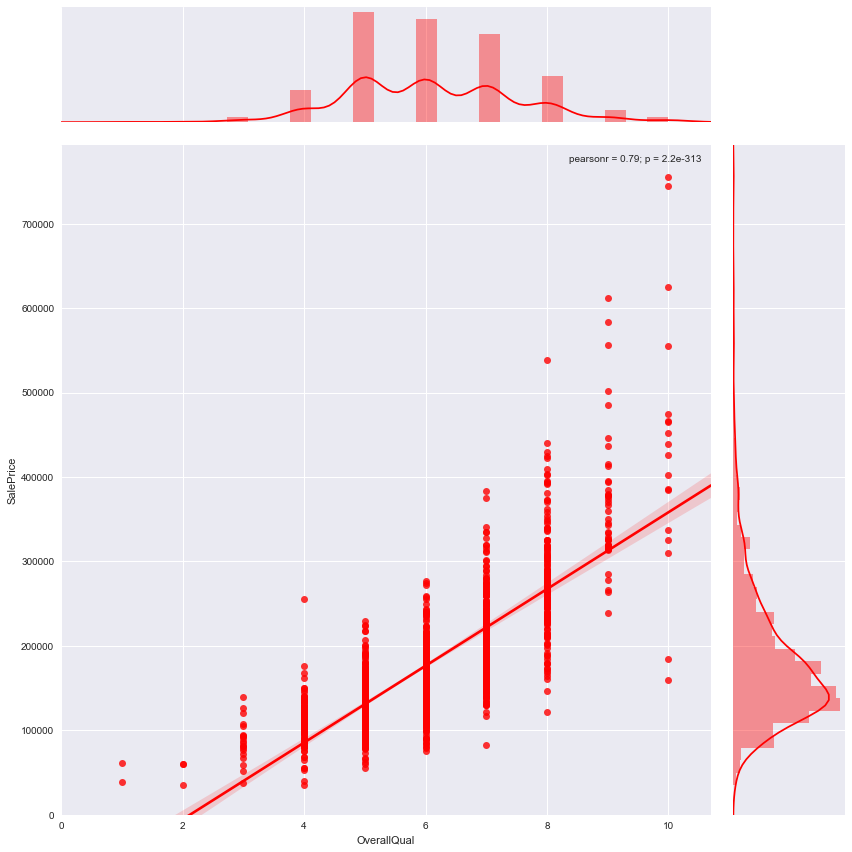

In [22]:
g = sns.jointplot(y='SalePrice', x='OverallQual', data=df, kind="reg",
                      xlim=(0, max(df.OverallQual)+0.07*max(df.OverallQual)), ylim=(0, max(df.SalePrice)+0.05*max(df.SalePrice)), color="r", size=12)

Good example of correlation. Price increases with overall quality of property, which is evidence.

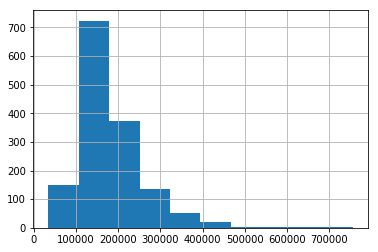

In [6]:
df.SalePrice.hist()

Here we can see that more than half of properties priced within [1000,20000] euros.
Now we need to define which variables/parameters are important for prediction.

In [7]:
"""Features Selection"""
X=df.reindex(columns=['MSSubClass','MSZoning','LotFrontage','LotArea','LotShape','LandContour','Utilities','LotConfig',
                      'LandSlope','Neighborhood','Condition1','BldgType', 'OverallQual','OverallCond', 'YearBuilt',
                      'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','GrLivArea', 'FullBath',
                      'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','PoolArea',
                      'SaleType','YrSold','Foundation'])
y=df.SalePrice
X=X.fillna(0)

model = LinearRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 16)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)


[False  True False False  True False  True  True  True False  True  True
  True  True False False False False False False False  True False  True
  True  True  True False False  True False  True]
[ 6  1 12 17  1  2  1  1  1  3  1  1  1  1  4  8 10 14 16 15  9  1  5  1
  1  1  1 11 13  1  7  1]


Here we can see the most important variables. 

In [8]:
"""Features Chosen"""
X=df.reindex(columns=['MSZoning','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','OverallQual','FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','SaleType','Foundation'])
y=df.SalePrice


Now we can calculate the correlation between chosen variables and the price of property.

In [9]:
target=y.name
features=X.columns.tolist()
correlations = {}
for f in features:
    data_temp = df[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [10]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]


,Value
OverallQual vs SalePrice,0.790982
FullBath vs SalePrice,0.560664
TotRmsAbvGrd vs SalePrice,0.533723
Fireplaces vs SalePrice,0.466929
Foundation vs SalePrice,-0.429678
LotShape vs SalePrice,0.267759
BedroomAbvGr vs SalePrice,0.168213
Neighborhood vs SalePrice,-0.143621
KitchenAbvGr vs SalePrice,-0.135907
MSZoning vs SalePrice,-0.116047


For better prediction, we need to take into account variables with high correlation score. So, let's use 0.1 as threshold.

In [11]:
# Train a simple linear regression model
regr = linear_model.LinearRegression()
new_data = df[['MSZoning','LotShape','Foundation','LotConfig','Neighborhood','BldgType','OverallQual','FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces']]

In [12]:
X = new_data.values
y = df.SalePrice.values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)
regr.fit(X_train, y_train)
regr.score(X_test,y_test)


0.6769901170269987

With coefficient of determination equal to 0.68 we obtain good quality model.

In [13]:
print("RMSE: %.2f"
      % math.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))

RMSE: 43627.25


Here RMSE score is important for the comparison with simple model.

In [19]:
corr={}
key = 'predictions vs y_test'
corr[key] = pearsonr(regr.predict(X_test),y_test)[0]
    
data_correlations = pd.DataFrame(corr, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
predictions vs y_test,0.823746


The correlation between predicted and true values is 82%

In [14]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [15]:
traindf, testdf = train_test_split(X_train, test_size = 0.4)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [16]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.7755292582156403


Explained variance score can be compared with coefficient of determination. Here we can see that XgBoost based model explains more data.

In [17]:
print("RMSE: %.2f"
      % math.sqrt(np.mean((predictions - y_test) ** 2)))

RMSE: 33501.61


RMSE score for second model is lower, hence the model is better fit.

In [18]:
corr={}
key = 'predictions vs y_test'
corr[key] = pearsonr(predictions,y_test)[0]
    
data_correlations = pd.DataFrame(corr, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
predictions vs y_test,0.899992


The correlation between predicted and true values is 90% which proves one more time that XgBoost based model better predicts the value.

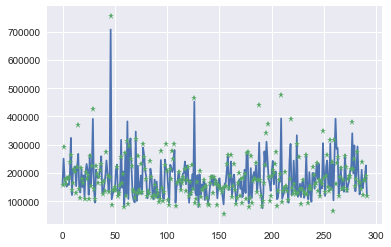

In [21]:
sns.set()
plt.plot(range(len(predictions)),predictions,range(len(predictions)),y_test, '*')

Here we can see outliers which are not explained by model and from other side we can see that model fits quite well.

In [25]:
sns.set(style="darkgrid", color_codes=True)

d = df[['Id','OverallQual','Foundation','FullBath','TotRmsAbvGrd','Fireplaces','LotShape','BedroomAbvGr','Neighborhood','KitchenAbvGr','MSZoning','SalePrice']].copy()

d.set_index('Id', inplace=True, drop=True)
model = sm.OLS(d.SalePrice, d.loc[:, d.columns != 'SalePrice'])
#model = sm.RLM(d.SalePrice, d.loc[:, d.columns != 'SalePrice'], M=sm.robust.norms.HuberT())
d['resid'] = model.fit().resid

In [26]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     3068.
Date:                Tue, 04 Dec 2018   Prob (F-statistic):               0.00
Time:                        01:35:43   Log-Likelihood:                -17613.
No. Observations:                1460   AIC:                         3.525e+04
Df Residuals:                    1450   BIC:                         3.530e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   2.411e+04    862.758     27.945      0.000    2.24e+04    2.58e+04
Foundation   -9293.7070   1523.250     -6.101      0.000   -1.23e+04   -6305.697
FullBath       1.74e+04   2721.532      6.395      0.000    1.21e+04    2.27e+04
TotRmsAbvGrd  1.643e+04   1159.355     14.176      0.000    1.42e+04    1.87e+04
Fireplaces    1.547e+04   1969.485      7.854      0.000    1.16e+04    1.93e+04
LotShape      7764.5815   1985.693      3.910      0.000    3869.444    1.17e+04
BedroomAbvGr -1.651e+04   1859.395     -8.877      0.000   -2.02e+04   -1.29e+04
Neighborhood -1224.3553    183.619     -6.668      0.000   -1584.543    -864.168
KitchenAbvGr -4.277e+04   4616.653     -9.263      0.000   -5.18e+04   -3.37e+04
MSZoning     -6087.6135   1438.123     -4.233      0.000   -8908.638   -3266.589
==============================================================================
Omnibus:                      641.174   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9778.886
Skew:                           1.636   Prob(JB):                         0.00
Kurtosis:                      15.249   Cond. No.                         60.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Last model is the simpliest one. But as you can see, coefficient of determination is almost 95%. Hence, this model can be treated as the best one.

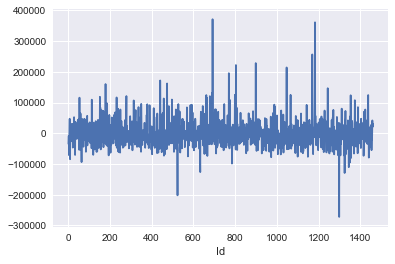

In [28]:
d.resid.plot()

Here we can see that error rate is almost white noise with several outliers, which is totally fine.